In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import plotly.express as px
import plotly.offline as pyo
import json

In [161]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/swiggy.csv")

In [162]:
type(df)

pandas.core.frame.DataFrame

In [163]:
df.head(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [164]:
df.tail(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


In [165]:
df.shape


(148541, 11)

In [166]:
df.city.nunique()

821

In [167]:
df.city.unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [168]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


**Delete Duplicate Value**

Its important to remove duplicate rows to avoid biasness in our analysis. Since id is unique identifier of our restaurants, we can use it to remove duplicates.

In [169]:
df = df.rename(columns={'Unnamed: 0':'id'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
#df.set_index('id', inplace=True)
df.shape

(148541, 11)

In [170]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [171]:
Null = df.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/df.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False).style.background_gradient()

,index,Null,% Null
0,id,0,0.000000
1,name,86,0.000000
2,city,0,0.000000
3,rating,86,0.000000
4,rating_count,86,0.000000
5,cost,131,0.000000
6,cuisine,99,0.000000
7,lic_no,229,0.000000
8,link,0,0.000000
9,address,86,0.000000


In [172]:
df.drop_duplicates(["id"],keep='first',inplace=True)
df.shape

(148541, 11)

There were no duplicate values from the dataset which is reffered for this study.

In [173]:
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148255, 11)

In [174]:
df.city.replace(['Noida-1','Noida'],'Noida',inplace=True)

# **EDA******

In [175]:
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))
    except:
        #print(Data.rating[i])
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)                # Where rating is not givem keep it null
        else:
            print(df.rating[i])
print(len(Rating))
print(df.shape[0])
df.rating = Rating
df.rating.dtypes

148255
148255


dtype('float64')

In [176]:
df.isnull().sum()

id                  0
name                0
city                0
rating          86912
rating_count        0
cost                0
cuisine             0
lic_no              0
link                0
address             0
menu                0
dtype: int64

Drop Null value rows

**** Restaurant with Maximum rating throughout the dataset¶
****************

In [177]:
print('The maximum rating Restaurant are:')
df[df.rating == df.rating.max()][['name','rating']]

The maximum rating Restaurant are:


,name,rating
752,Pablo Premium Kitchen,5.0
1013,The best diet corner,5.0
9682,Creams and Bites,5.0
9730,Bansal's Thali & Combo Meals,5.0
10153,GOWHEY- HEALTHY DESSERT COMPANY,5.0
...,...,...
140456,Chenab Kitchen,5.0
145982,Cream House,5.0
147148,HINDUSTANI BURGER,5.0
147149,KEBAB NATION,5.0


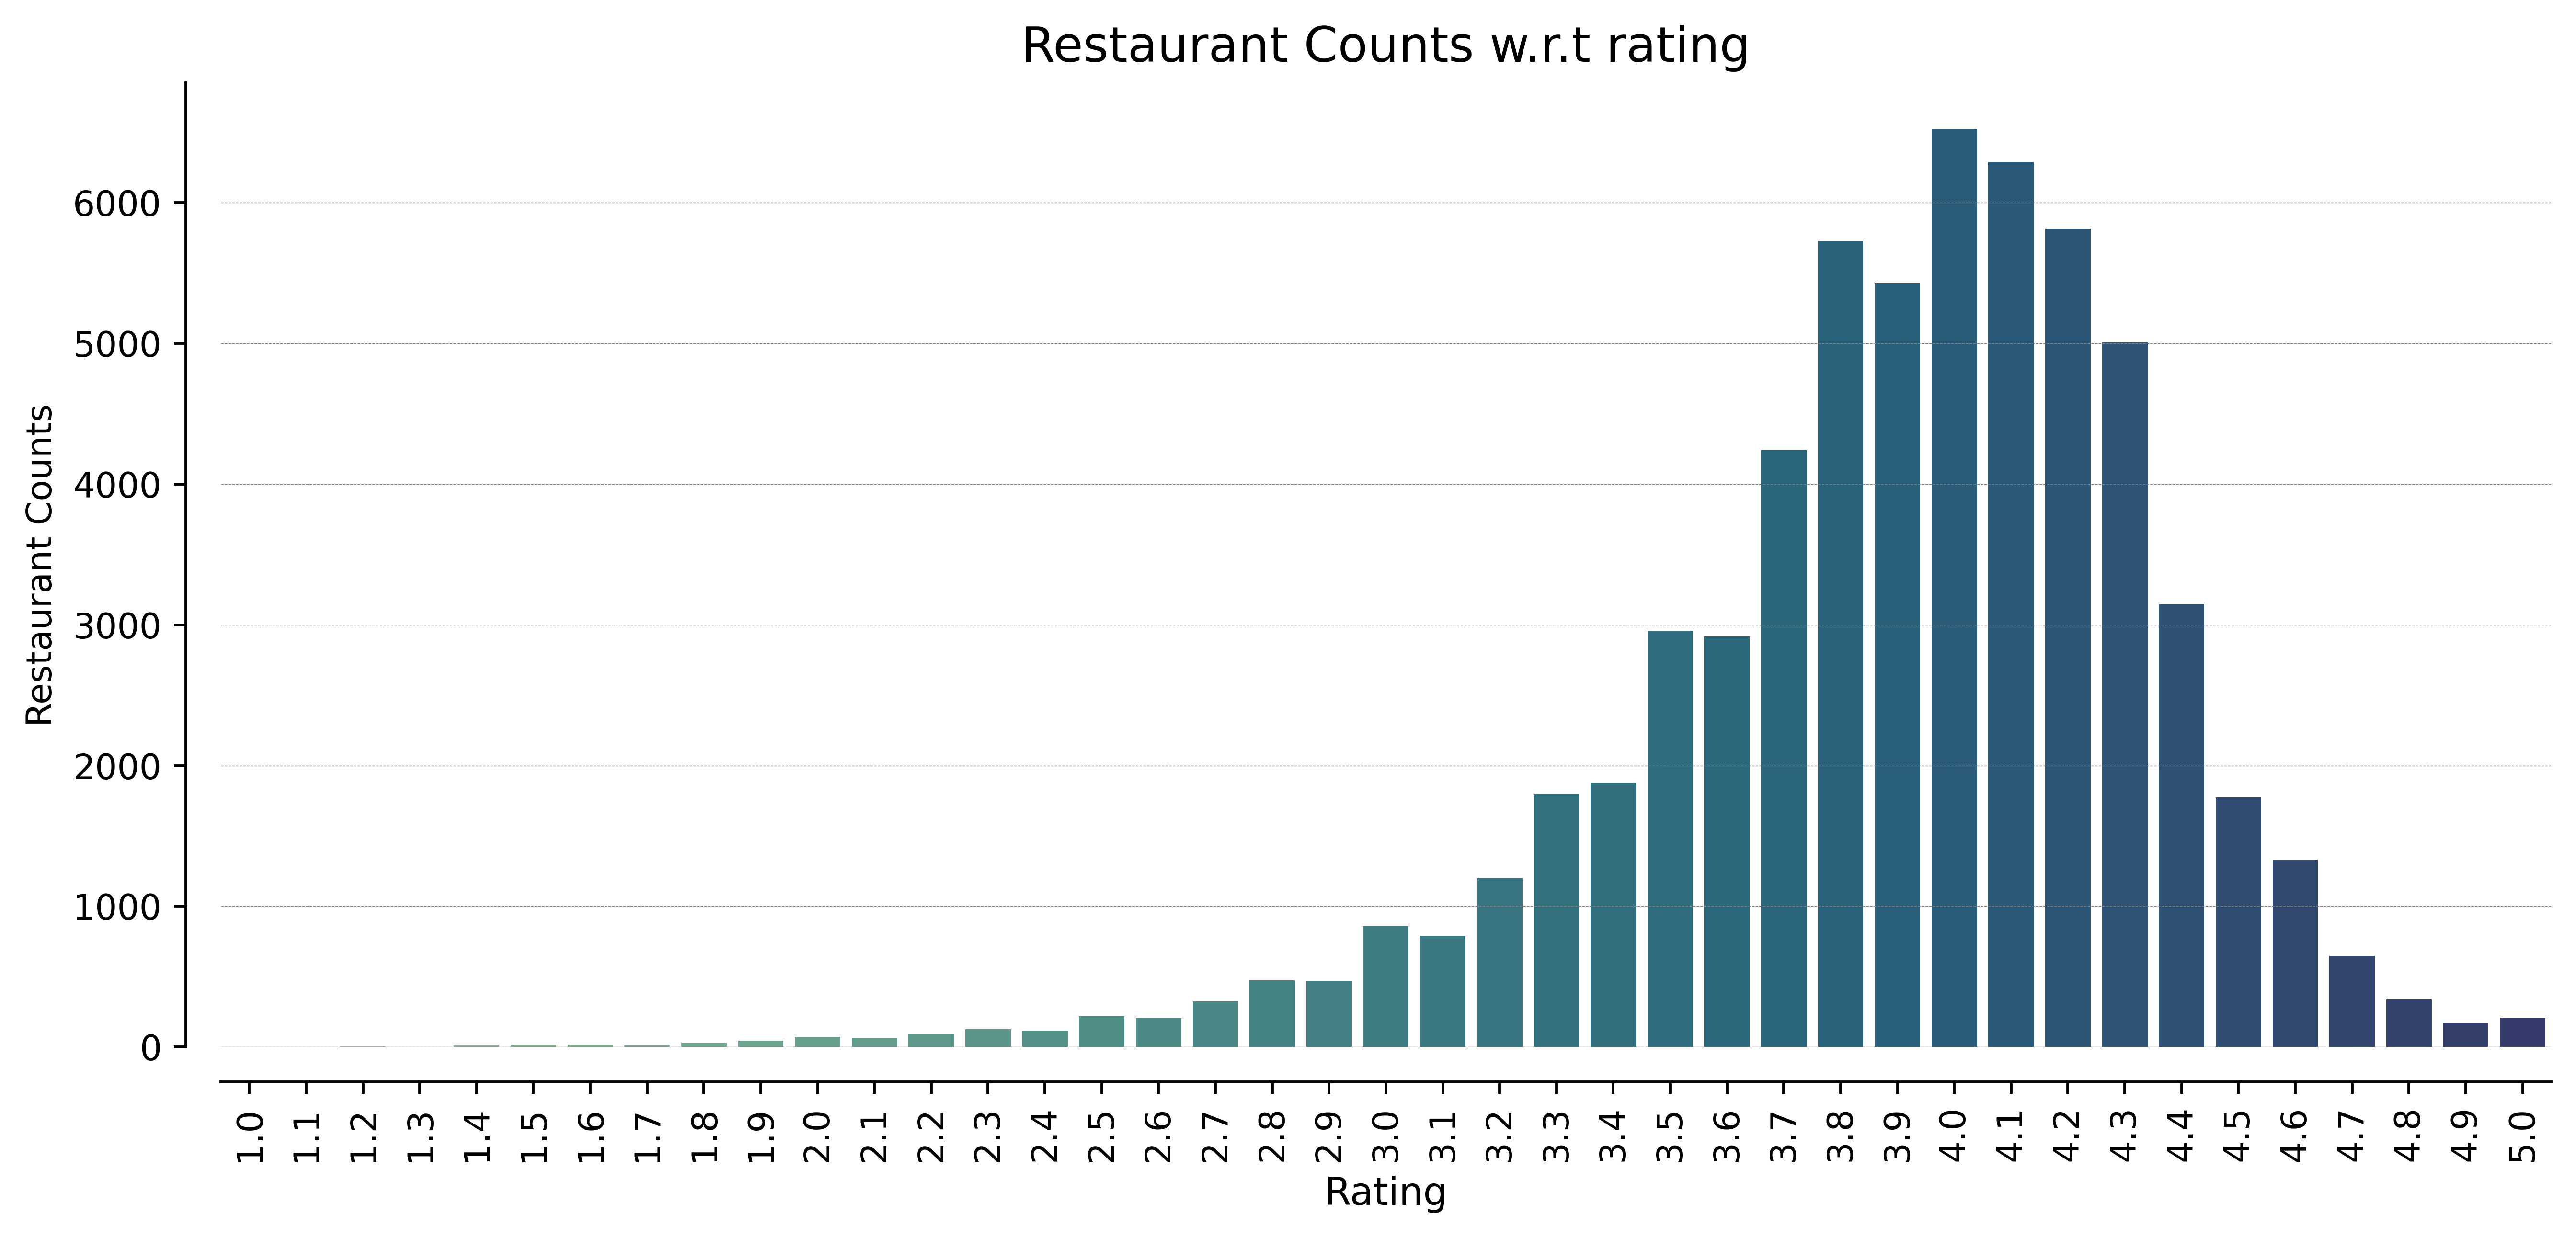

In [178]:
data = df.groupby('rating', as_index = False).agg('count')[['rating','name']]

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)

#sns.set_style('whitegrid')

# Seaborn Bar plot
sns.barplot(data = data,
           x='rating',
           y = 'name',
           palette= "crest"#'plasma'
          )


# Set horizontal grid lines
plt.grid(True, axis = 'y',
         color = 'gray',
         linestyle = '--',
         linewidth=0.2
        )

# Remove vertical grid lines
plt.grid(False, axis = 'x')

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)

plt.xlabel("Rating", fontsize = 11)                                # Set X label
plt.ylabel("Restaurant Counts", fontsize = 10)                     # Set Y label
plt.title('Restaurant Counts w.r.t rating', fontsize = 14)         # Set title
plt.show()

In [179]:
R = df.groupby('rating', as_index = False).agg('count').rename({'name':'R_Counts'}, axis=1)[['rating','R_Counts']]

R = {'<1.0':R[R['rating']<=1.0].R_Counts.sum(),
    '1.1-2.0':R[(R['rating']>1.0) & (R['rating']<=2.0)].R_Counts.sum(),
    '2.1-3.0':R[(R['rating']>2.0) & (R['rating']<=3.0)].R_Counts.sum(),
    '3.1-4.0':R[(R['rating']>3.0) & (R['rating']<=4.0)].R_Counts.sum(),
    '4.1-5.0':R[(R['rating']>4.0) & (R['rating']<=5.0)].R_Counts.sum()
    }

R = pd.DataFrame((R.keys(),R.values()), index=['Rating', 'Counts']).T

In [180]:
fig = px.pie(R,
       names='Rating',
       values='Counts',
       labels={'Counts':'Restaurant Counts'},
       color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,
       title='<b> Restaurants Counts as per Rating<b>'
      )

fig.show()
pyo.plot(fig, filename = 'Restaurants Counts as per Rating.html', auto_open = True)

'Restaurants Counts as per Rating.html'

In [181]:
outlets = df["name"].value_counts()
outlets

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
                                                  ... 
Azad Chicken Point                                   1
Punjab de paranthe                                   1
delhi 6 Chicken Point                                1
Mirch Masala by Chauhan Sahab                        1
Lazeez kitchen                                       1
Name: name, Length: 112683, dtype: int64

In [182]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [183]:
chains

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
                                                  ... 
Rollicks Ice Cream Cakes & Deserts                   2
The Arabian Factory                                  2
LA TANDOORI                                          2
Bombay Kitchen                                       2
Hotel Surya                                          2
Name: name, Length: 10624, dtype: int64

In [184]:
single

Mr. Roll Kathi & Shawarma        1
Purvanchal Dhaba                 1
D 'N' D DRINK N DIET             1
ORIENTAL SPICE                   1
KRAMB Cafe & Gaming Arcade       1
                                ..
Azad Chicken Point               1
Punjab de paranthe               1
delhi 6 Chicken Point            1
Mirch Masala by Chauhan Sahab    1
Lazeez kitchen                   1
Name: name, Length: 102059, dtype: int64

In [185]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are part of some chain = ", df.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  148255
Total Restaurants that are part of some chain =  46196
Percentage of Restaurants that are part of a chain =  31.0 %


In [186]:
chains.head(5)

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
Name: name, dtype: int64

In [187]:
top5_chains = df["name"].value_counts()[:5].sort_values(ascending=True)

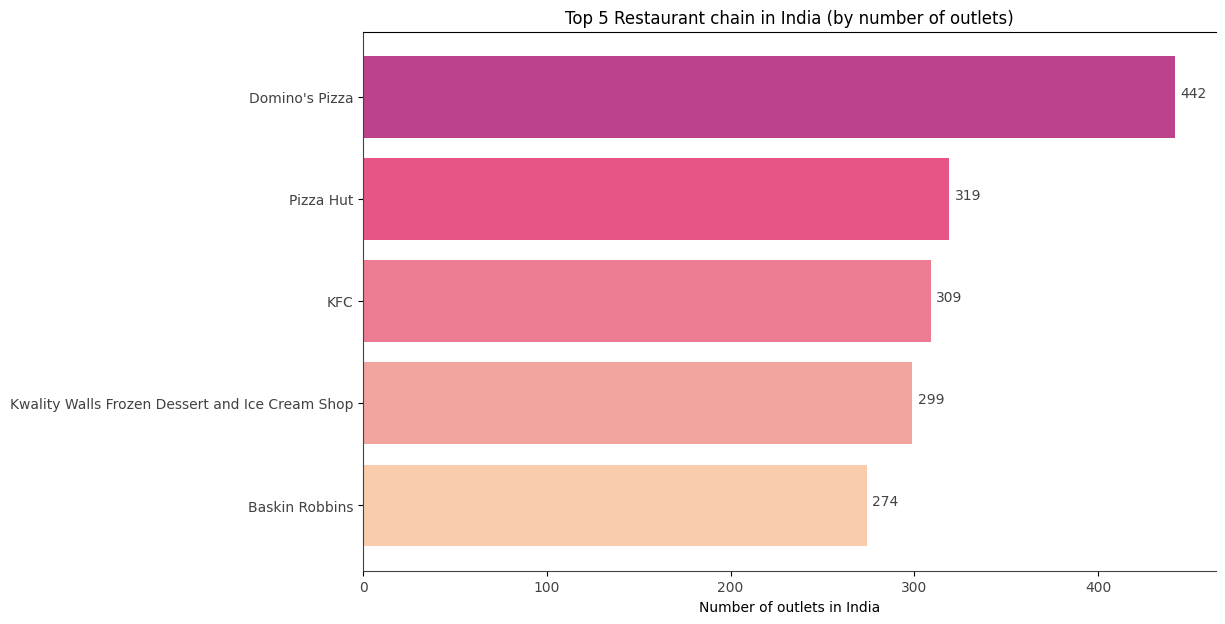

In [188]:
height = top5_chains.values
bars = top5_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 5 Restaurant chain in India (by number of outlets)")


plt.show()

In [189]:
print("Total number of unique cuisines = ", df.cuisine.nunique())

Total number of unique cuisines =  2131


In [190]:
df.cuisine.unique()

array(['Beverages,Pizzas', 'Sweets,Bakery', 'Beverages', ...,
       'Biryani,Thai', 'South American,Andhra',
       'Barbecue,Italian-American'], dtype=object)

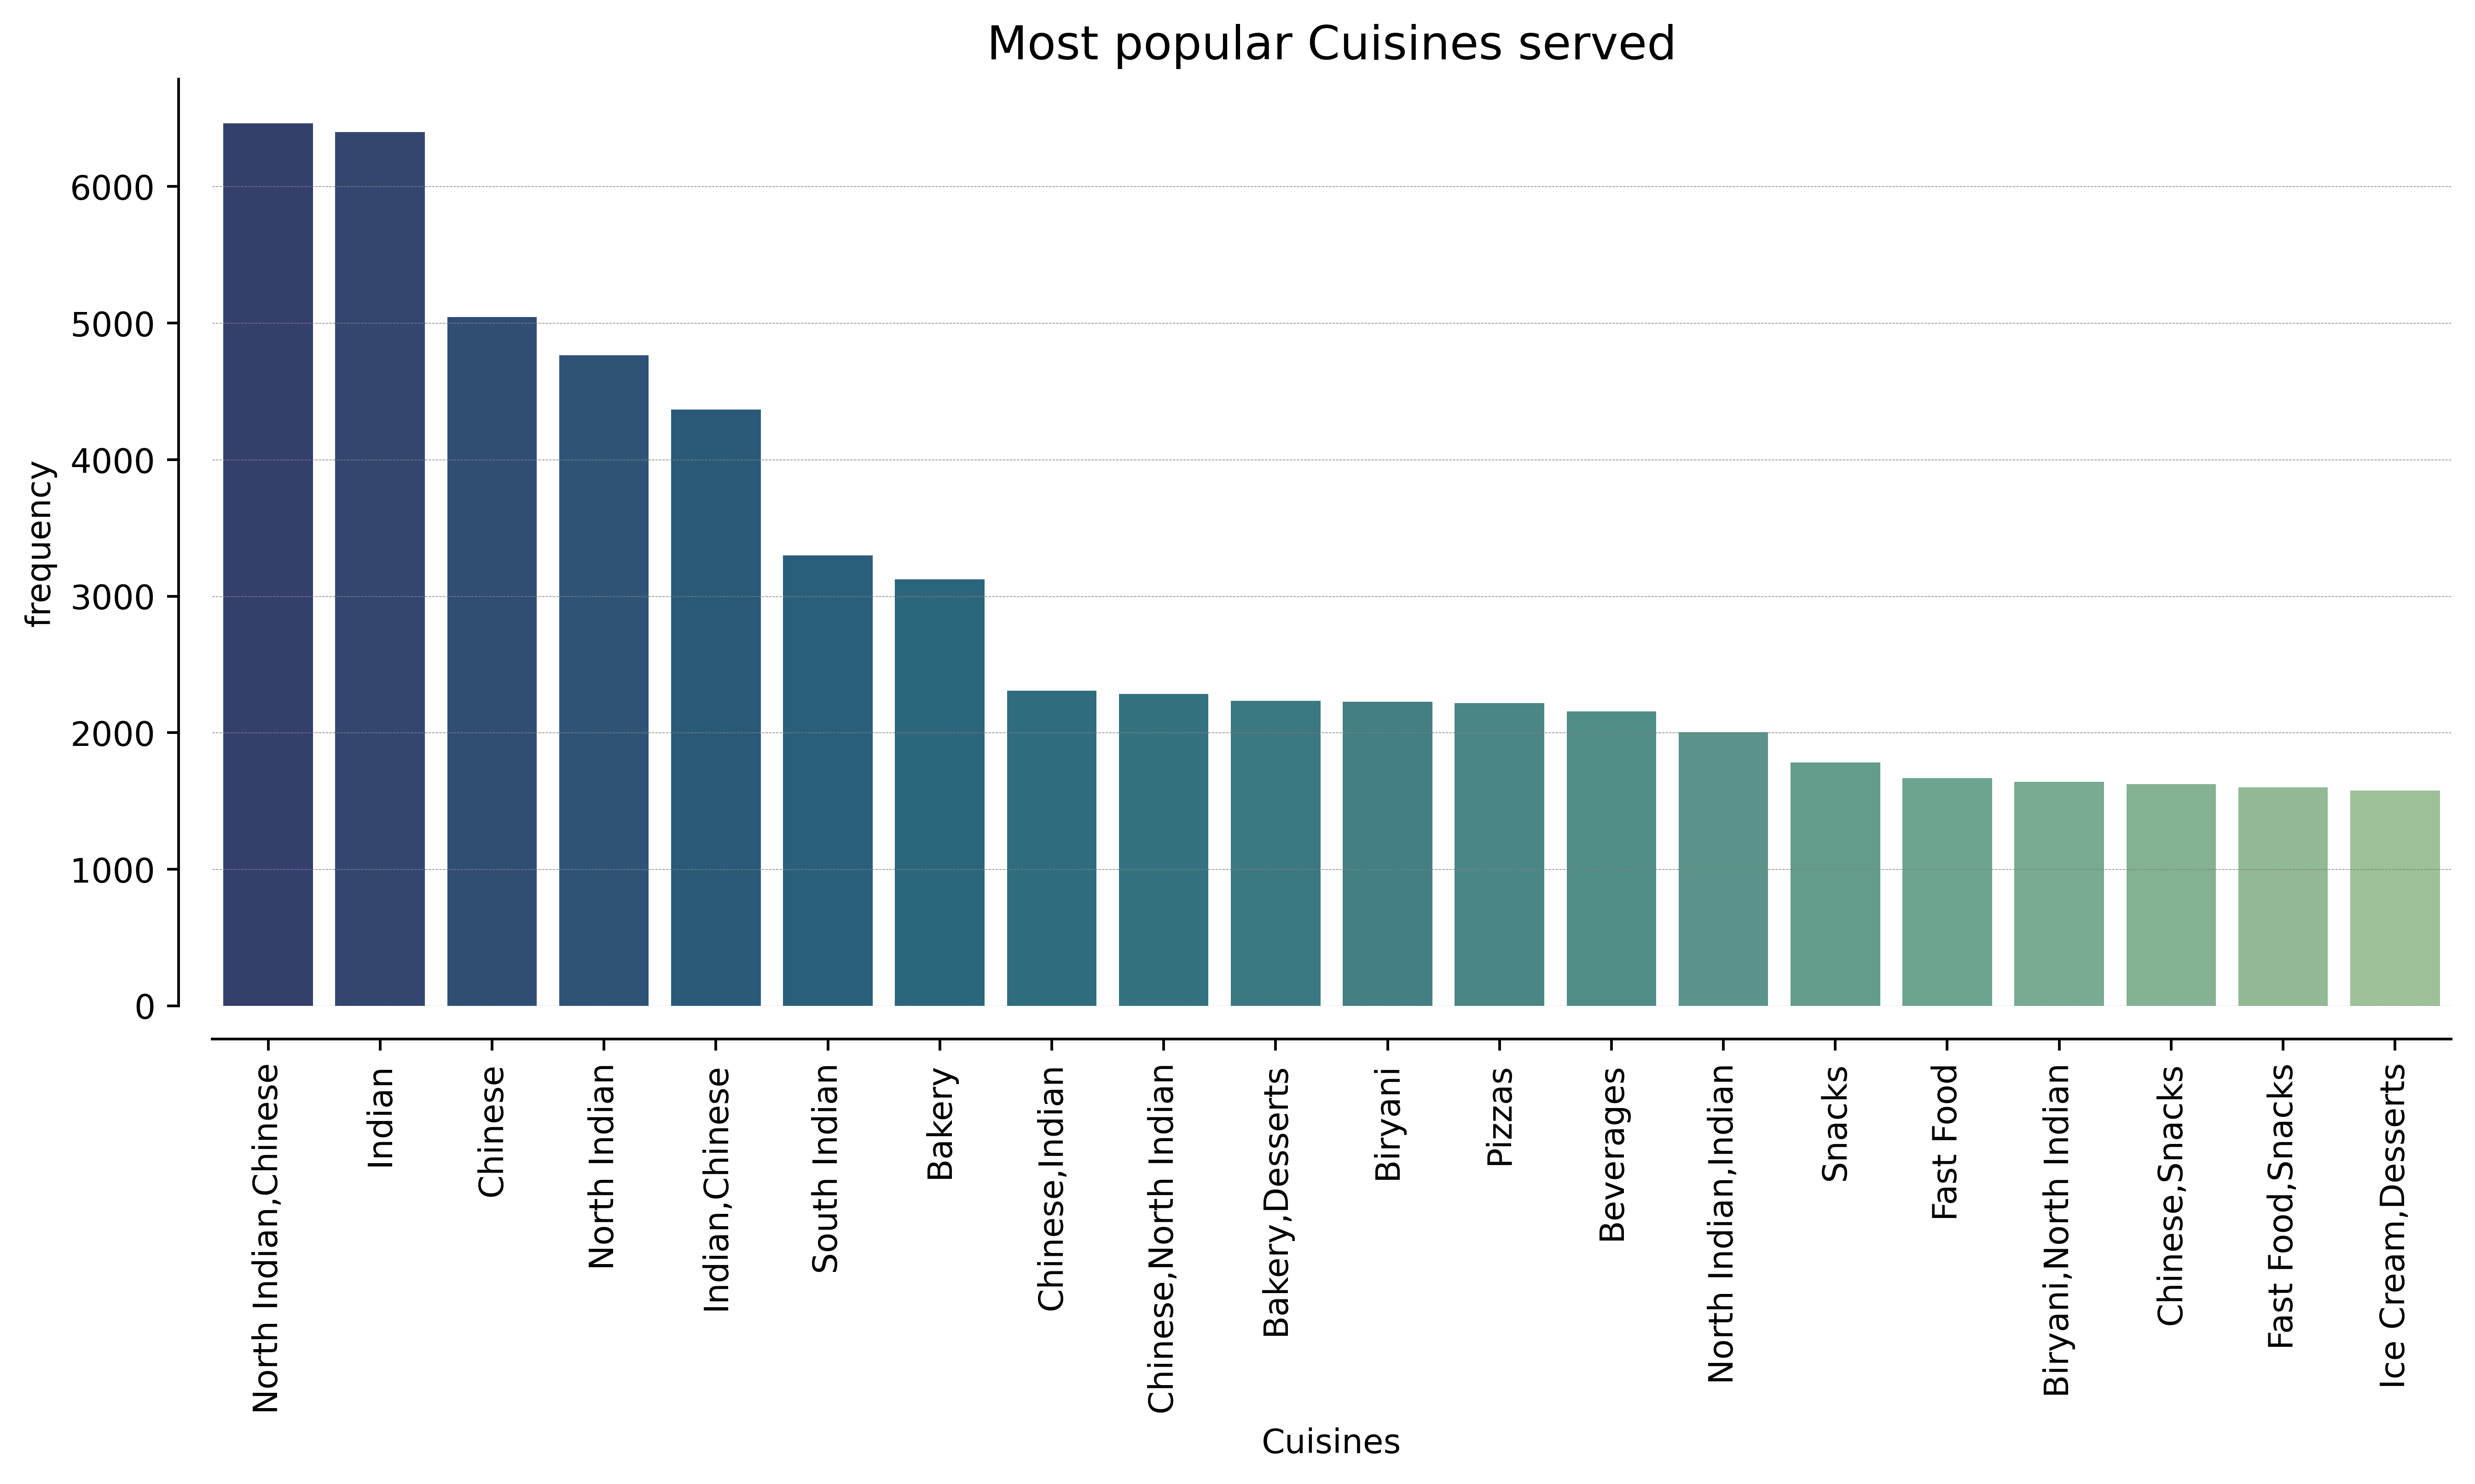

In [191]:
c = df.cuisine.value_counts().reset_index().rename({'index':'Cuisine','cuisine':'frequency'}, axis =1)

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)
#sn.set_style('whitegrid')

# Seaborn Bar plot
sns.barplot(data = c.head(20),
           x='Cuisine',
           y = 'frequency',
           palette= "crest_r" #'plasma'
          )



plt.grid(True, axis = 'y',
         color = 'gray',
         linestyle = '--',
         linewidth=0.2
        )

plt.grid(False, axis = 'x')

sns.despine(offset=10, trim=False)

plt.xticks(rotation = 90)

plt.xlabel("Cuisines", fontsize = 10)
plt.ylabel("frequency", fontsize = 10)
plt.title('Most popular Cuisines served', fontsize = 14)
plt.show()


In [192]:
df = df.dropna()

In [193]:
df.sort_values(by = ['city','cost'], ascending=False)



,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
68078,430818,Dhaba Estd 1986 Delhi,"sohna road,Gurgaon",4.0,20+ ratings,₹ 900,"Biryani,Hyderabadi",10821005001165,https://www.swiggy.com/restaurants/dhaba-estd-...,"Dhaba Estd 1986 Delhi, Ground Floor,World Mark...",Menu/430818.json
67924,183115,Theobroma,"sohna road,Gurgaon",4.4,1K+ ratings,₹ 800,"Bakery,Desserts",10821005001086,https://www.swiggy.com/restaurants/theobroma-s...,"Theobroma, Baani Square, Shop No. G-6, GroundF...",Menu/183115.json
67948,242468,Cafe Delhi Heights,"sohna road,Gurgaon",4.0,100+ ratings,₹ 800,"Continental,American",10819005000919,https://www.swiggy.com/restaurants/cafe-delhi-...,"Cafe Delhi Heights, Cafe Delhi Heights, 223A, ...",Menu/242468.json
68042,33089,Fat Lulu's Pizza,"sohna road,Gurgaon",3.9,100+ ratings,₹ 800,"Pizzas,Italian",10816005000035,https://www.swiggy.com/restaurants/fat-lulus-p...,"Fat Lulu's Pizza, SCO 133 1st floor, huda mar...",Menu/33089.json
68178,428957,Fabcafe By Fabindia,"sohna road,Gurgaon",4.1,20+ ratings,₹ 800,"North Indian,Healthy Food",10821005001134,https://www.swiggy.com/restaurants/fabcafe-by-...,"Fabcafe By Fabindia, Unit no. 1 C, and 01, Gro...",Menu/428957.json
...,...,...,...,...,...,...,...,...,...,...,...
74259,38675,Softy Den,"Abids & Koti,Hyderabad",4.1,100+ ratings,₹ 150,Beverages,13622011000159,https://www.swiggy.com/restaurants/softy-den-n...,"Softy Den, #5-9-303, Ground Floor, Next to Ros...",Menu/38675.json
74175,6745,Tibbs Frankie,"Abids & Koti,Hyderabad",4.3,100+ ratings,₹ 140,"Snacks,Indian",23619030002862,https://www.swiggy.com/restaurants/tibbs-frank...,"Tibbs Frankie, Ground Floor, Below Big Bazar, ...",Menu/6745.json
74168,82818,Lavish Corner,"Abids & Koti,Hyderabad",3.9,500+ ratings,₹ 120,"Chinese,Indian",13621011001848,https://www.swiggy.com/restaurants/lavish-corn...,"Lavish Corner, 5-9-88/1, Saphire Complex, Chap...",Menu/82818.json
74164,10251,Amay Tiffin Corner (Amul),"Abids & Koti,Hyderabad",3.9,1K+ ratings,₹ 100,South Indian,23619030000353,https://www.swiggy.com/restaurants/amay-tiffin...,"Amay Tiffin Corner (Amul), #Shop No: 4/210/1/D...",Menu/10251.json


In [194]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
5,158204,Sam Uncle,Abohar,3.6,20+ ratings,₹ 200,Continental,22119652000052,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh...",Menu/158204.json
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,₹ 150,North Indian,22120652000021,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve...",Menu/156588.json
...,...,...,...,...,...,...,...,...,...,...,...
148214,185298,Jain Varities & Icecream Corner,Yavatmal,3.7,50+ ratings,₹ 150,"Snacks,Fast Food",21517407000608,https://www.swiggy.com/restaurants/jain-variti...,"Jain Varities & Icecream Corner, Naringe Nagar...",Menu/185298.json
148217,140164,Ranade Bandhu,Yavatmal,4.7,20+ ratings,₹ 100,"Sweets,Fast Food",11518053000235,https://www.swiggy.com/restaurants/ranade-band...,"Ranade Bandhu, Datta Chowk, Yavatmal",Menu/140164.json
148223,214598,Satkar Dinning Hall,Yavatmal,3.6,100+ ratings,₹ 200,"Maharashtrian,North Indian",21518407000289,https://www.swiggy.com/restaurants/satkar-dinn...,"Satkar Dinning Hall, Oswal market Chowk, Yavat...",Menu/214598.json
148230,140174,Suraj Hotel,Yavatmal,3.0,20+ ratings,₹ 200,"North Indian,Fast Food",21519407000581,https://www.swiggy.com/restaurants/suraj-hotel...,"Suraj Hotel, Darwha Rd, Lohara, MIDC, Yavatmal...",Menu/140174.json


***Emerging Tier 1 City- "Bangalore"***

In [234]:
df.city.replace(['Yeshwanthpur,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Geddalahalli,Bangalore','Bangalore'],'Bangalore',inplace=True)
df.city.replace(['Koramangala,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['JP Nagar,Bangalore','Bangalore'],'Bangalore',inplace=True)
df.city.replace(['HSR,Bangalore',],'Bangalore''Bangalore',inplace=True)
df.city.replace(['Arekere,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Yeshwanthpur,Bangalore','Bangalore',],'Vadodara',inplace=True)
df.city.replace(['Indiranagar,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Banashankari,Bangalore','Bangalore',],'Bangalore',inplace=True)
df.city.replace(['Whitefield,Bangalore','Bangalore',],'Bangalore',inplace=True)


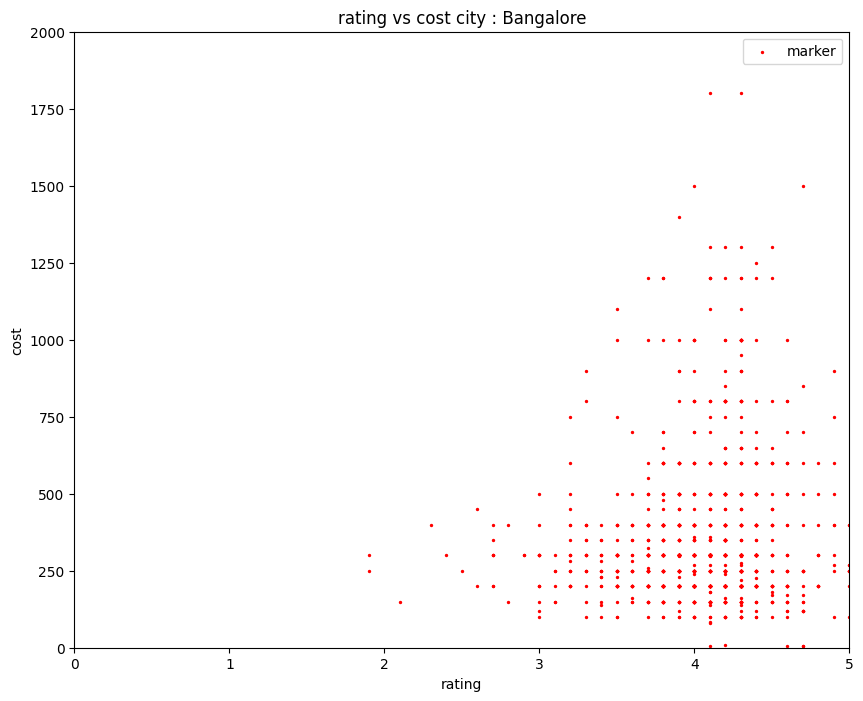

In [242]:
plt.figure(figsize=(10,8)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Bangalore"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "red")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


***Emerging Tier 1 City- Pune***

In [257]:
df.city.replace(['Yeshwanthpur,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Wanowrie,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Koregaon Park,Pune',],'Pune',inplace=True)
df.city.replace(['Hadapsar,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Warje,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Pimple Saudagar,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Kothrud,Pune','Pune',],'Pune',inplace=True)
df.city.replace(['Vishrantwadi,Pune','Pune',],'Pune',inplace=True)

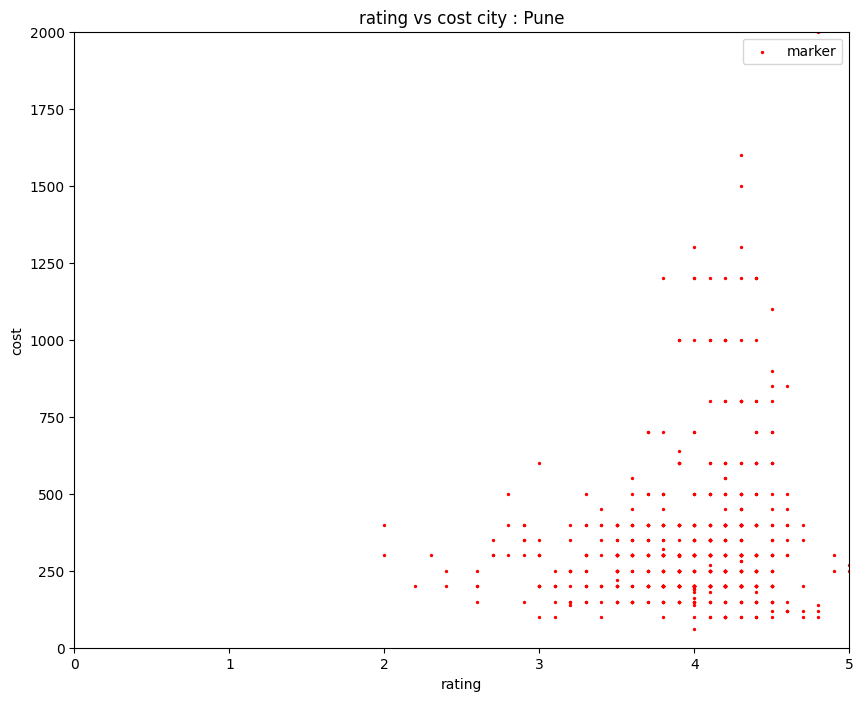

In [258]:
plt.figure(figsize=(10,8)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Pune"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "red")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


***Emerging Tier 2 City-Ahmedabad***

In [256]:
df.city.replace(['Vastrapur,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['GOTA,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Vastrapur,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Ghatlodia,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Bopal,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Gandhinagar,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)
df.city.replace(['Naranpura,Ahmedabad','Ahmedabad',],'Ahmedabad',inplace=True)

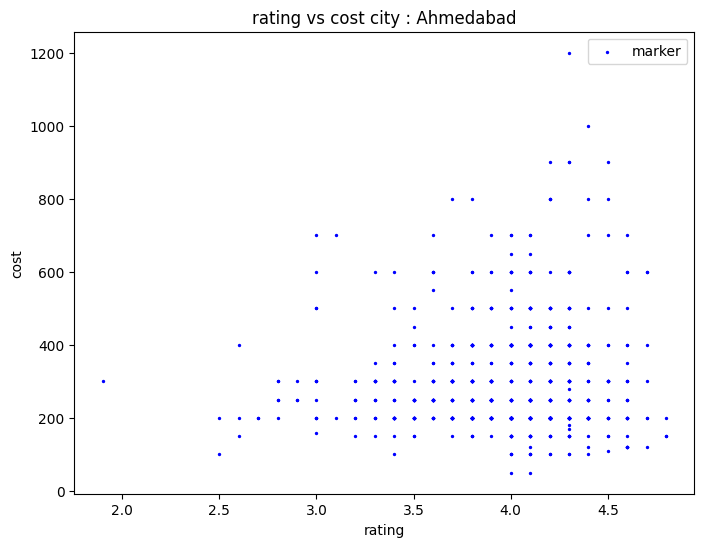

In [255]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Ahmedabad"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", s=2, color= "blue")

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

# plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


***Emerging Tier 2 City- Kochi***

In [250]:
df.city.replace(['Vyttila,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Kalamassery,Kochi','Kochi'],'Kochi',inplace=True)
df.city.replace(['Aluva,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Panampilly Nagar,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Lulu Mall,Kochi','Kochi'],'Kochi',inplace=True)
df.city.replace(['Fort Kochi,Kochi','Kochi',],'Kochi',inplace=True)
df.city.replace(['Thrippunithura,Kochi','Kochi',],'Kochi',inplace=True)

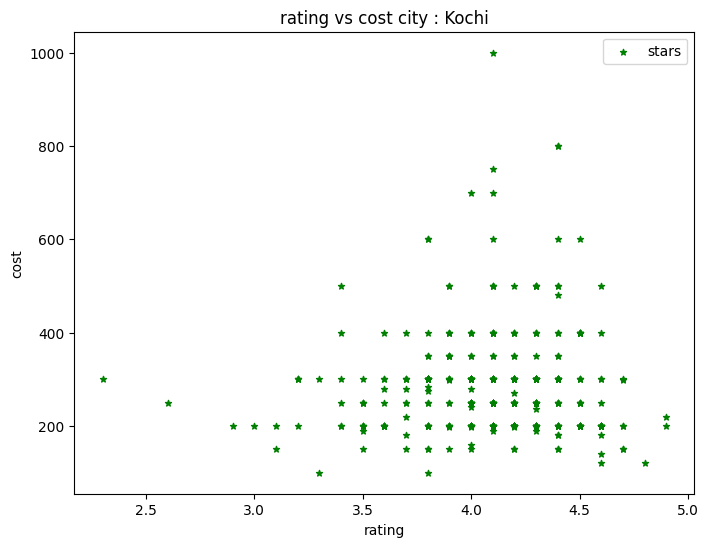

In [251]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Kochi"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=20)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

# plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


***Emerging Tier 3 City- Bhubaneshwar***

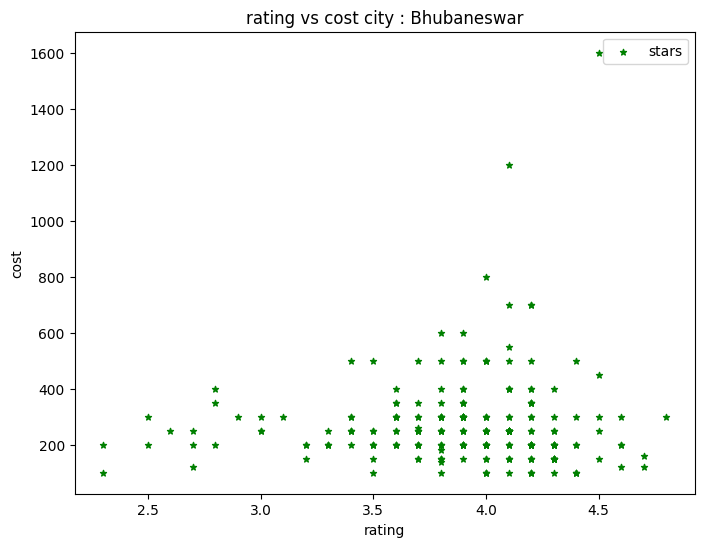

In [245]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Bhubaneswar"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=20)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

# plt.xlim(0, 5)
# plt.ylim(0,10)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()


***Emerging Tier 3 City- Vadodara***

In [231]:
df.city.replace(['Vadiwali,Vadodara','Vadodara',],'Vadodara',inplace=True)
df.city.replace(['Akota,Vadodara','Vadodara',],'Vadodara',inplace=True)

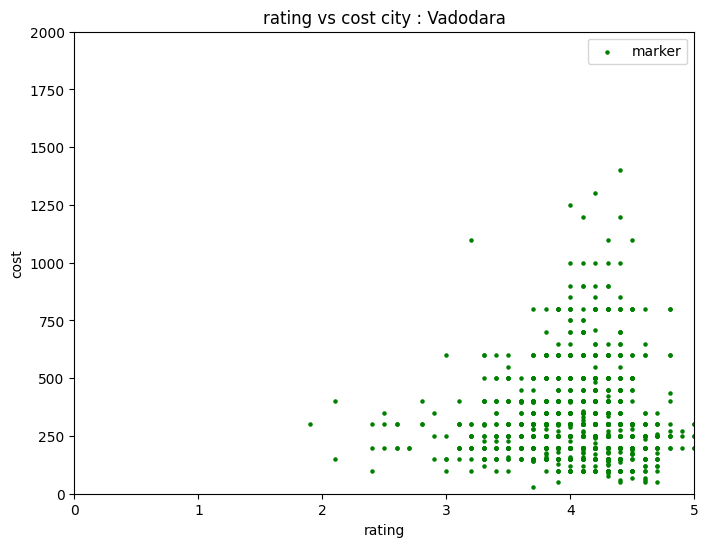

In [248]:
plt.figure(figsize=(8,6)),

#this line should be run onetime only, Once starting over run below line of code
#df['cost'] = df['cost'].str.replace('₹', '').astype(int)

specific_city = "Vadodara"

df1_subset= df[df["city"]== specific_city]

#Below line is sorting by cost for original daraframe that is df not for specific city it will give output for all values in the dataset
# df_sorted = df.sort_values(by='cost')

#Below line is sorting by cost for specific city
df_sorted = df1_subset.sort_values(by='cost')

# x-axis values
x = df_sorted["rating"].values
# y-axis values
y = df_sorted["cost"].values

# plotting points as a scatter plot
plt.scatter(x, y, label= "marker", color= "green", s=5)

# x-axis label
plt.xlabel('rating')
# frequency label
plt.ylabel('cost')
# plot title
plt.title('rating vs cost')

plt.xlim(0, 5)
plt.ylim(0,2000)
#plt.grid(True)

#Adding Title
plt.title(f'rating vs cost city : {specific_city}')

# showing legend
plt.legend()

# function to show the plot
plt.show()

